### Here is where my prediciton model will be developed for traffic congestion in South Dublin
#### Firstly, we want to split the prepared dataset up into Weekdays VS Weekends, traffic congestion will vary a lot depedning on the time in the week, so it is best to treat the weekdays (the working week) differently to the weekend

In [26]:
#Importations of libraries needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats

In [27]:
#Import dataset as dataframe:
df = pd.read_csv('../Datasets/TrafficFlow/prepared_FlowJanJun2022.csv')
df = df.drop('ObjectId', axis=1)
df = df.drop('Unnamed: 0', axis=1) # Remove unknown column
print("The data contains {0} rows and {1} columns".format(df.shape[0], df.shape[1]))
df.head(5)

The data contains 25105 rows and 8 columns


,site,day,date,start_time,end_time,flow,cong,dsat
0,N01111A,TU,04/01/2022,2022/11/07 11:45:00+00,12:00,6.098074,1.098612,3.637586
1,N01111A,TU,04/01/2022,2022/11/07 14:00:00+00,14:15,6.230481,1.098612,3.688879
2,N01111A,TU,04/01/2022,2022/11/07 14:15:00+00,14:30,6.265301,1.609438,3.663562
3,N01111A,MO,03/01/2022,2022/11/07 12:45:00+00,13:00,5.843544,1.098612,3.401197
4,N01111A,TU,04/01/2022,2022/11/07 15:45:00+00,16:00,5.953243,1.098612,3.465736


In [28]:
# Change form of start_time to match end_time
df['start_time'] = pd.to_datetime(df['start_time']).dt.strftime('%H:%M')
df.head(5)

,site,day,date,start_time,end_time,flow,cong,dsat
0,N01111A,TU,04/01/2022,11:45,12:00,6.098074,1.098612,3.637586
1,N01111A,TU,04/01/2022,14:00,14:15,6.230481,1.098612,3.688879
2,N01111A,TU,04/01/2022,14:15,14:30,6.265301,1.609438,3.663562
3,N01111A,MO,03/01/2022,12:45,13:00,5.843544,1.098612,3.401197
4,N01111A,TU,04/01/2022,15:45,16:00,5.953243,1.098612,3.465736


In [29]:
# Get unique values in the 'day' column
unique_days = df['day'].unique()

# Print the unique values
print(unique_days)

['TU' 'MO' 'TH' 'FR' 'WE' 'SA' 'SU']


#### Commpare congestion weekday vs weekend

In [30]:
# Filter for weekdays
df_weekday = df[df['day'].isin(['MO', 'TU', 'WE', 'TH', 'FR'])]

# Filter for weekend
df_weekend = df[df['day'].isin(['SA', 'SU'])]

# Now, df_weekday contains entries for Monday to Friday, and df_weekend contains entries for Saturday and Sunday
print(df_weekday['day'].unique())
print(df_weekend['day'].unique())

['TU' 'MO' 'TH' 'FR' 'WE']
['SA' 'SU']


In [31]:
def showDistribution(dataframe1, dataframe2):
    columns = ['flow', 'cong', 'dsat']  # The columns to plot

    for col in columns:
        plt.figure(figsize=(10, 4))
        # Plot the first DataFrame histogram
        plt.hist(dataframe1[col], bins=30, color='r', alpha=0.6, label='Weekdays')
        # Plot the second DataFrame histogram
        plt.hist(dataframe2[col], bins=30, color='b', alpha=0.6, label='Weekends')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
        plt.legend()
        plt.show()

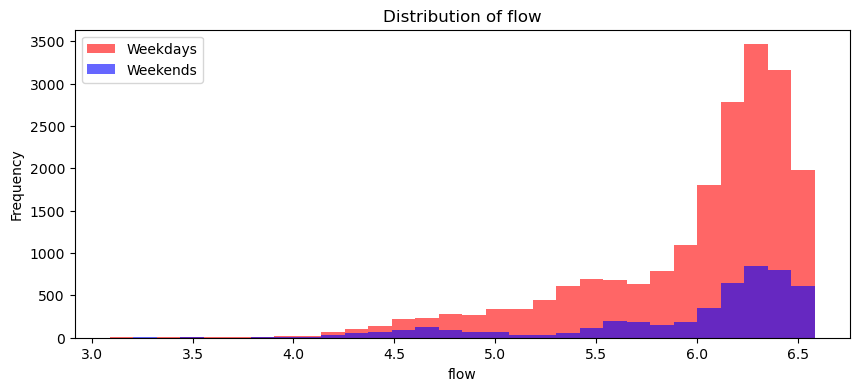

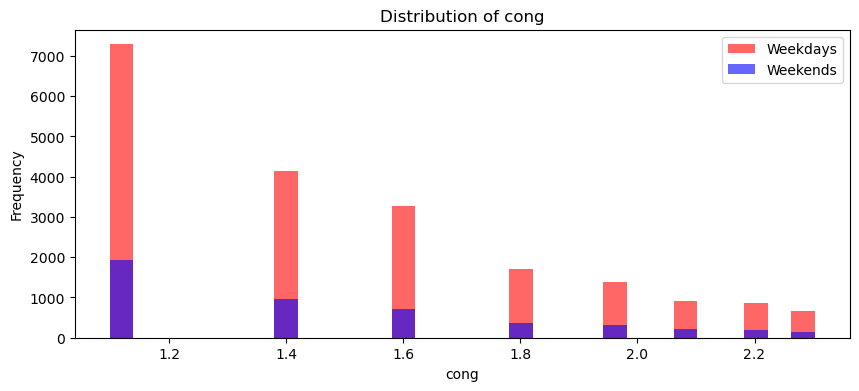

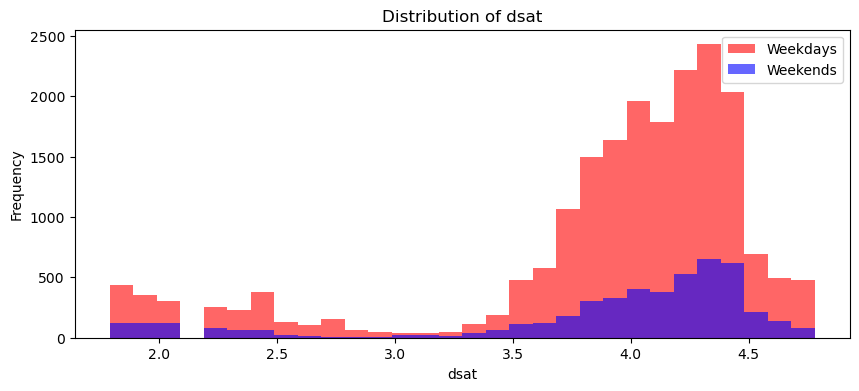

In [32]:
showDistribution(df_weekday, df_weekend)

#### Compare total `flow`, `cong` and `dsat` based on the Days

In [33]:
def showDistributionByDay(dataframe):
    columns = ['flow', 'cong', 'dsat']  # The columns to plot
    days = ['MO', 'TU', 'WE', 'TH', 'FR', 'SA', 'SU']  # Days of the week

    for col in columns:
        plt.figure(figsize=(8, 6))
        totals = []  # Initialize an empty list to store totals for all days
        for day in days:
            # Sum the values in the current column for the current day
            total = dataframe[dataframe['day'] == day][col].sum()
            totals.append(total)
        # Plot the totals for all days for the current column
        plt.bar(days, totals, alpha=0.6)
        plt.xlabel('Day')
        plt.ylabel(f'Total {col}')
        plt.title(f'Total {col} by Day')
        plt.show()


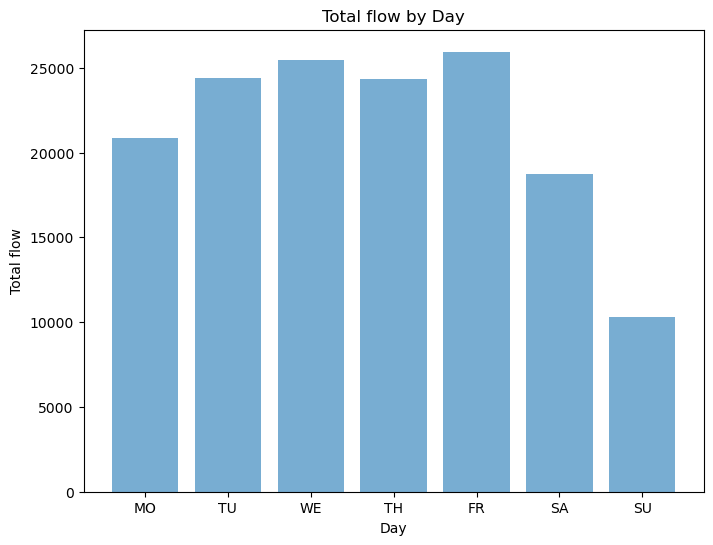

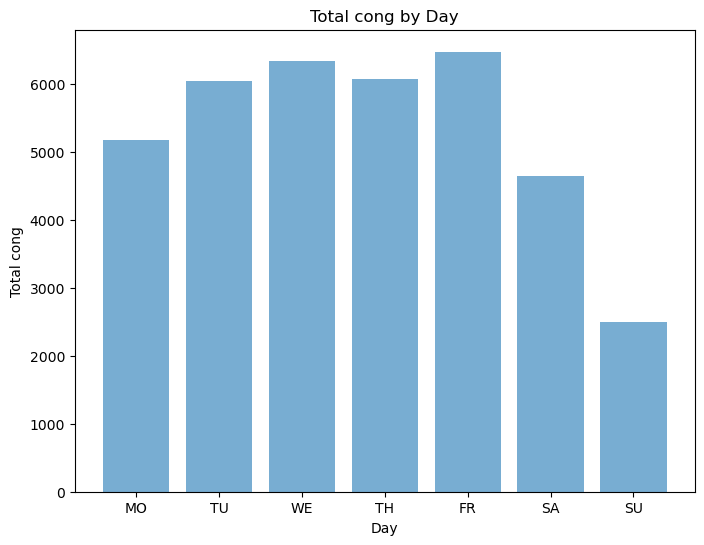

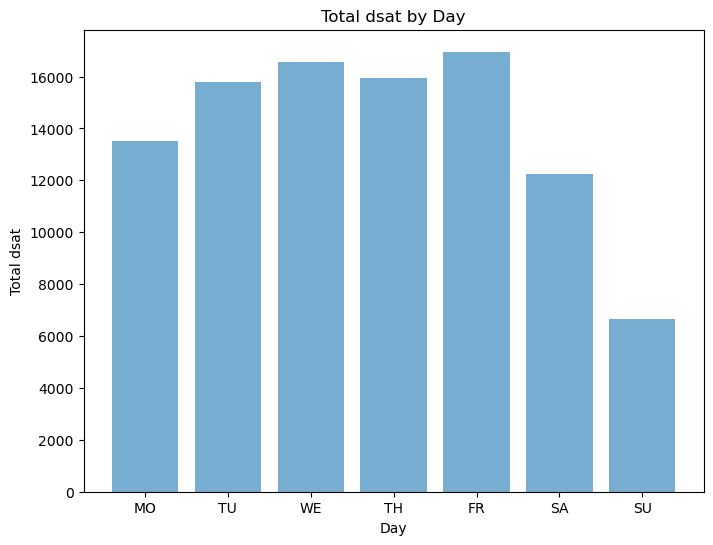

In [34]:
showDistributionByDay(df)

#### Compare total `flow`, `cong` and `dsat` based on the time

In [35]:
import matplotlib.pyplot as plt

def showDistributionByStartTime(dataframe):
    columns = ['flow', 'cong', 'dsat']  # The columns to plot

    # Assuming 'start_time' is already in an appropriate format for direct use
    # (e.g., each value uniquely identifies a time period to group by)

    # Get unique start times in the order they appear in the dataframe
    unique_start_times = dataframe['start_time'].sort_values().unique()

    for col in columns:
        plt.figure(figsize=(12, 6))  # Adjusted figure size for potentially large number of unique times
        totals = []  # Initialize an empty list to store totals for each unique start time
        
        for start_time in unique_start_times:
            # Sum the values in the current column for the current start time
            total = dataframe[dataframe['start_time'] == start_time][col].sum()
            totals.append(total)
        
        # Plot the totals for each unique start time for the current column
        plt.bar(range(len(unique_start_times)), totals, alpha=0.6)
        plt.xticks(range(len(unique_start_times)), labels=unique_start_times, rotation=90)  # Rotate labels for readability
        plt.xlabel('Start Time')
        plt.ylabel(f'Total {col}')
        plt.title(f'Total {col} by Start Time')
        plt.tight_layout()  # Adjust layout to make room for label rotation
        plt.show()


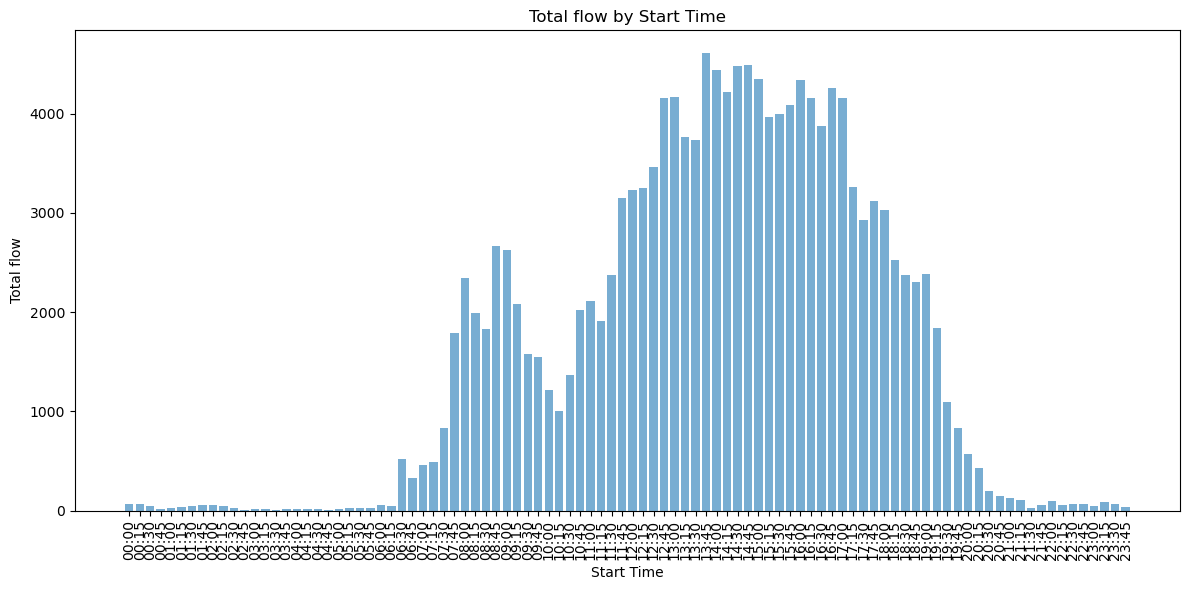

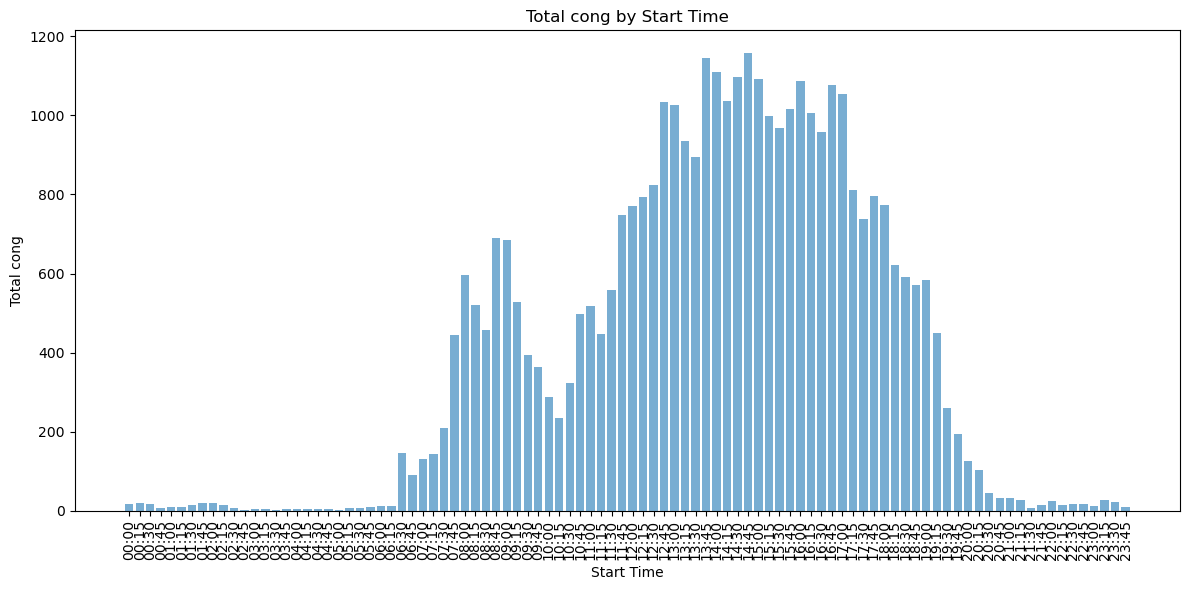

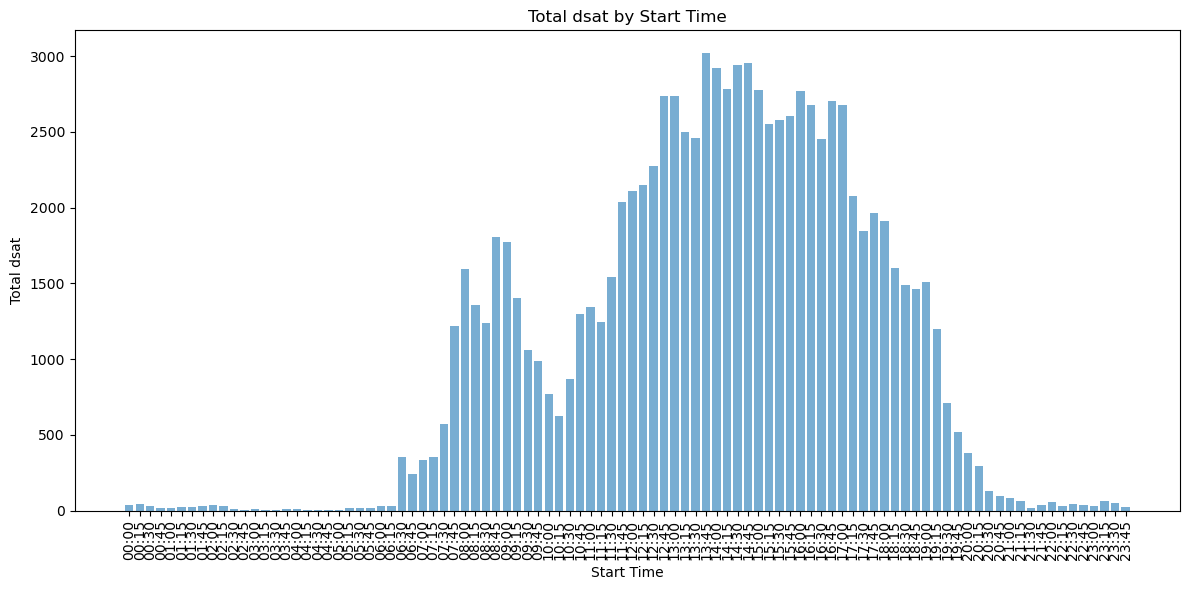

In [36]:
showDistributionByStartTime(df)

In [37]:
df_weekday.dtypes

site           object
day            object
date           object
start_time     object
end_time       object
flow          float64
cong          float64
dsat          float64
dtype: object

### Now we must reformat the data so that the formats of the data can be read by our prediction model

In [38]:
df.head(5)

,site,day,date,start_time,end_time,flow,cong,dsat
0,N01111A,TU,04/01/2022,11:45,12:00,6.098074,1.098612,3.637586
1,N01111A,TU,04/01/2022,14:00,14:15,6.230481,1.098612,3.688879
2,N01111A,TU,04/01/2022,14:15,14:30,6.265301,1.609438,3.663562
3,N01111A,MO,03/01/2022,12:45,13:00,5.843544,1.098612,3.401197
4,N01111A,TU,04/01/2022,15:45,16:00,5.953243,1.098612,3.465736


In [39]:
def reformatDatafram(dataframe):
    # Handle "24:00" in 'end_time'
    dataframe['end_time'] = dataframe['end_time'].replace('24:00', '00:00')

    # Convert 'date' to datetime
    dataframe['date'] = pd.to_datetime(dataframe['date'], format='%d/%m/%Y')

    # Convert 'start_time' and 'end_time' to datetime
    dataframe['start_time'] = pd.to_datetime(dataframe['start_time'], format='%H:%M')
    dataframe['end_time'] = pd.to_datetime(dataframe['end_time'], format='%H:%M')

    # Increment the date by one day where end_time is "00:00"
    dataframe.loc[dataframe['end_time'].dt.strftime('%H:%M') == '00:00', 'date'] += pd.Timedelta(days=1)

    # Extract year, month, and day as new features
    dataframe['year'] = dataframe['date'].dt.year
    dataframe['month'] = dataframe['date'].dt.month
    dataframe['day_of_month'] = dataframe['date'].dt.day

    # Calculate duration in minutes as a new feature
    dataframe['duration'] = (dataframe['end_time'] - dataframe['start_time']).dt.total_seconds() / 60

    # Extract hour and minute from 'start_time' and 'end_time'
    dataframe['start_hour'] = dataframe['start_time'].dt.hour
    dataframe['start_minute'] = dataframe['start_time'].dt.minute
    dataframe['end_hour'] = dataframe['end_time'].dt.hour
    dataframe['end_minute'] = dataframe['end_time'].dt.minute

    # Convert 'site' and 'day' to string type if they aren't already
    dataframe['site'] = dataframe['site'].astype(str)
    dataframe['day'] = dataframe['day'].astype(str)

    # One-hot encode 'site' and 'day' features
    dataframe = pd.get_dummies(dataframe, columns=['site', 'day'])

    # Now drop the original 'date', 'start_time', and 'end_time' columns as they are not needed
    dataframe = dataframe.drop(['date', 'start_time', 'end_time'], axis=1)
    
    return dataframe

In [40]:
df_weekday.head(5)

,site,day,date,start_time,end_time,flow,cong,dsat
0,N01111A,TU,04/01/2022,11:45,12:00,6.098074,1.098612,3.637586
1,N01111A,TU,04/01/2022,14:00,14:15,6.230481,1.098612,3.688879
2,N01111A,TU,04/01/2022,14:15,14:30,6.265301,1.609438,3.663562
3,N01111A,MO,03/01/2022,12:45,13:00,5.843544,1.098612,3.401197
4,N01111A,TU,04/01/2022,15:45,16:00,5.953243,1.098612,3.465736


In [41]:
df_weekday = reformatDatafram(df_weekday)

/var/folders/fj/1ykv5jrn7k5bplnhdvwsmzmr0000gn/T/ipykernel_9490/1087561398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['end_time'] = dataframe['end_time'].replace('24:00', '00:00')
/var/folders/fj/1ykv5jrn7k5bplnhdvwsmzmr0000gn/T/ipykernel_9490/1087561398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['date'] = pd.to_datetime(dataframe['date'], format='%d/%m/%Y')
/var/folders/fj/1ykv5jrn7k5bplnhdvwsmzmr0000gn/T/ipykernel_9490/1087561398.py:9: SettingWithCopyWarning: 
A value

In [42]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Now, when you display your DataFrame, all columns will be shown
print(df_weekday)

           flow      cong      dsat  year  month  day_of_month  duration  \
0      6.098074  1.098612  3.637586  2022      1             4      15.0   
1      6.230481  1.098612  3.688879  2022      1             4      15.0   
2      6.265301  1.609438  3.663562  2022      1             4      15.0   
3      5.843544  1.098612  3.401197  2022      1             3      15.0   
4      5.953243  1.098612  3.465736  2022      1             4      15.0   
...         ...       ...       ...   ...    ...           ...       ...   
25100  5.313206  1.098612  4.499810  2022      4             5      15.0   
25101  5.655992  1.945910  4.700480  2022      4             5      15.0   
25102  5.746203  2.302585  4.644391  2022      4             4      15.0   
25103  5.411646  1.098612  4.605170  2022      4             8      15.0   
25104  5.627621  2.079442  4.584967  2022      4             8      15.0   

       start_hour  start_minute  end_hour  end_minute  site_N01111A  \
0              1

## Prediction Model

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Assuming df_weekday is your DataFrame
X = df_weekday.drop(['cong', 'flow', 'dsat'], axis=1)
Y = df_weekday[['cong', 'flow', 'dsat']]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


In [44]:
# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(3)  # Assuming 'cong', 'flow', 'dsat' are your target variables
])

model.compile(optimizer='adam', loss='mse')


In [46]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), verbose=2)

Epoch 1/100
506/506 - 1s - loss: 2.9419 - val_loss: 0.2013 - 749ms/epoch - 1ms/step
Epoch 2/100
506/506 - 0s - loss: 0.1267 - val_loss: 0.0856 - 342ms/epoch - 676us/step
Epoch 3/100
506/506 - 0s - loss: 0.0825 - val_loss: 0.0785 - 335ms/epoch - 662us/step
Epoch 4/100
506/506 - 0s - loss: 0.0794 - val_loss: 0.0785 - 332ms/epoch - 656us/step
Epoch 5/100
506/506 - 0s - loss: 0.0793 - val_loss: 0.0782 - 333ms/epoch - 658us/step
Epoch 6/100
506/506 - 0s - loss: 0.0794 - val_loss: 0.0786 - 355ms/epoch - 701us/step
Epoch 7/100
506/506 - 0s - loss: 0.0792 - val_loss: 0.0790 - 332ms/epoch - 656us/step
Epoch 8/100
506/506 - 0s - loss: 0.0787 - val_loss: 0.0767 - 331ms/epoch - 655us/step
Epoch 9/100
506/506 - 0s - loss: 0.0767 - val_loss: 0.0758 - 330ms/epoch - 653us/step
Epoch 10/100
506/506 - 0s - loss: 0.0750 - val_loss: 0.0746 - 338ms/epoch - 668us/step
Epoch 11/100
506/506 - 0s - loss: 0.0742 - val_loss: 0.0732 - 344ms/epoch - 681us/step
Epoch 12/100
506/506 - 0s - loss: 0.0735 - val_loss: 0

In [47]:
test_loss = model.evaluate(X_test, Y_test, verbose=2)
print(f'Test loss: {test_loss}')

127/127 - 0s - loss: 0.0673 - 43ms/epoch - 342us/step
Test loss: 0.0673084557056427


In [48]:
predictions = model.predict(X_test)

127/127 [==============================] - 0s 325us/step


In [50]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, predictions)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 0.19335504275630763


In [51]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, predictions)
print(f'R-squared: {r2}')


R-squared: 0.6346194151773658


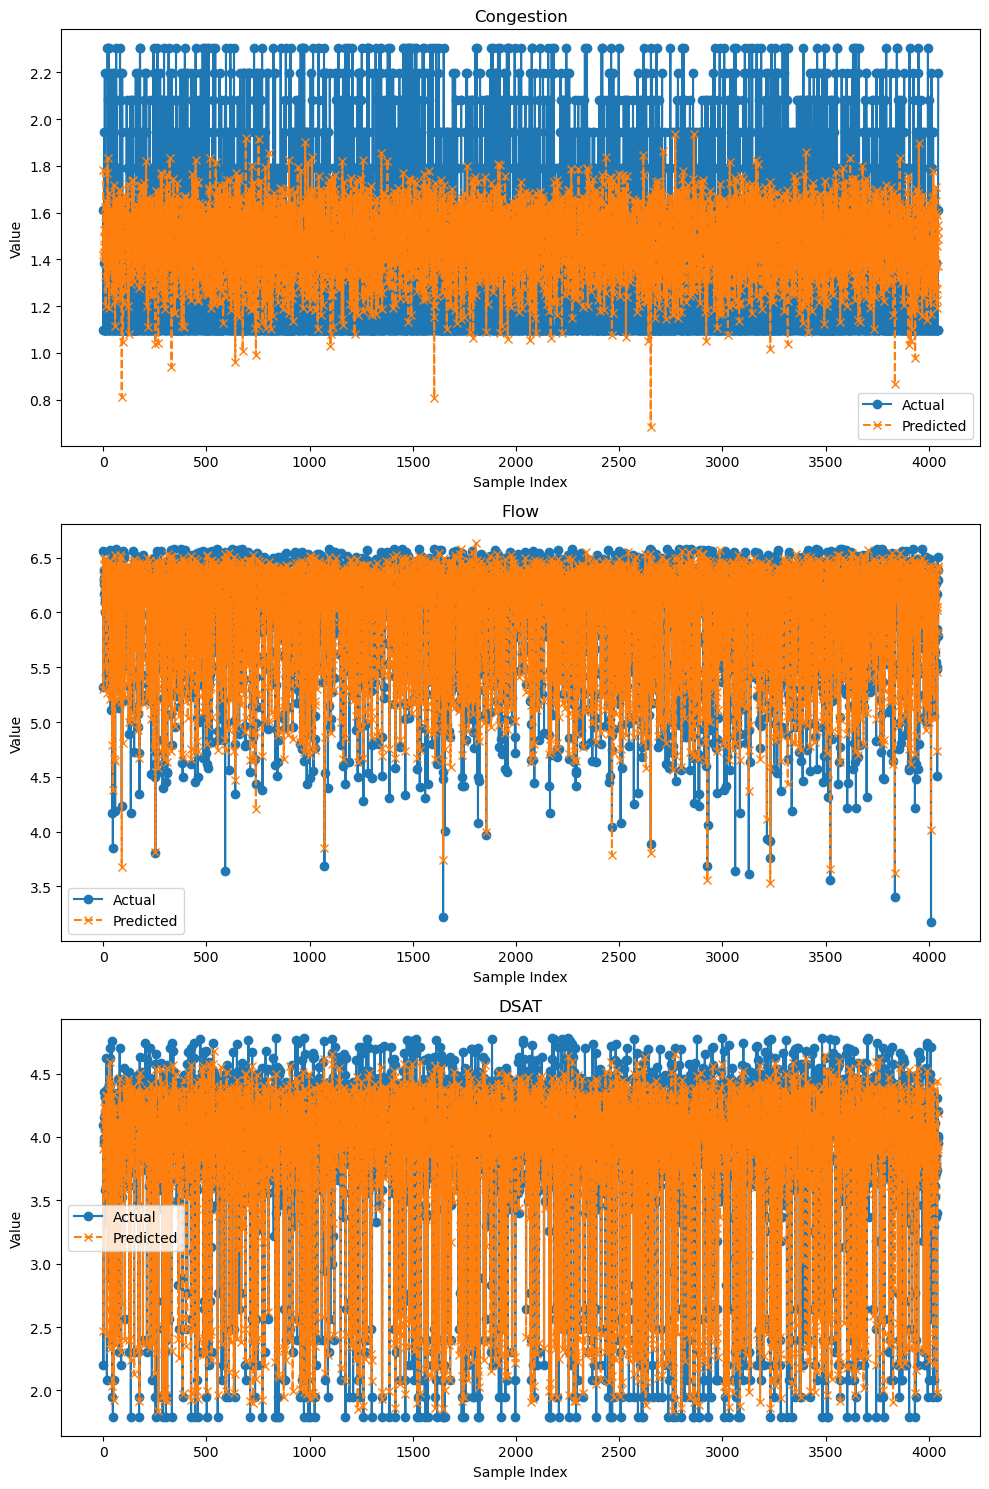

In [49]:
import matplotlib.pyplot as plt

# Assuming predictions is a numpy array with shape (n_samples, 3) where columns correspond to 'cong', 'flow', 'dsat'
# and Y_test is a DataFrame or a numpy array with the same structure

# Convert Y_test to numpy array if it's not already
Y_test_np = Y_test.to_numpy()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Titles for each subplot
titles = ['Congestion', 'Flow', 'DSAT']

for i in range(3):
    axs[i].plot(Y_test_np[:, i], label='Actual', marker='o')
    axs[i].plot(predictions[:, i], label='Predicted', linestyle='--', marker='x')
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Sample Index')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.tight_layout()
plt.show()


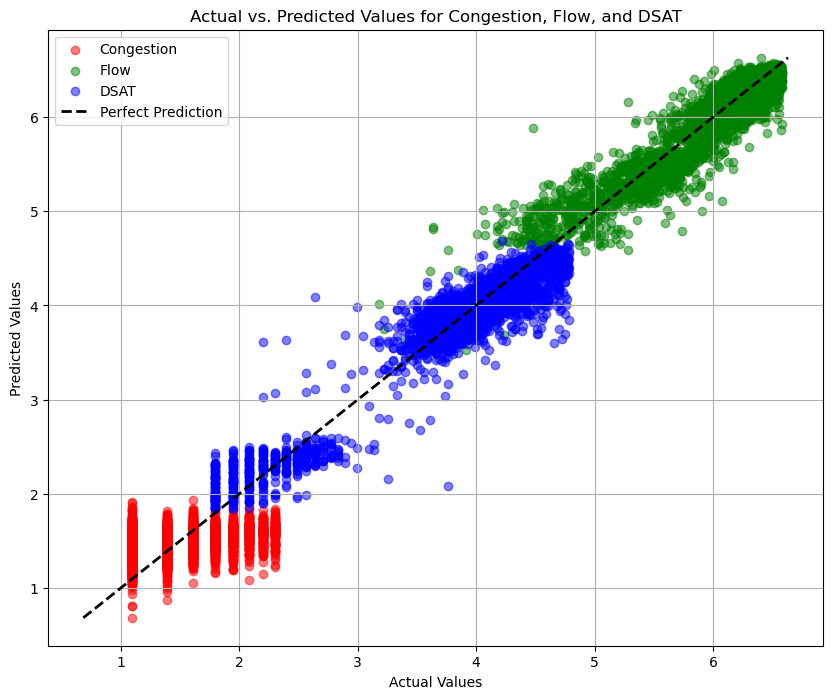

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Titles for each target variable
titles = ['Congestion', 'Flow', 'DSAT']

# Colors for each target variable
colors = ['red', 'green', 'blue']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 8))

# Plot each target variable
for i in range(3):
    # Scatter plot of actual vs. predicted values
    plt.scatter(Y_test_np[:, i], predictions[:, i], color=colors[i], alpha=0.5, label=titles[i])
    
# Plot a line of perfect prediction
max_val = max(np.max(Y_test_np), np.max(predictions))
min_val = min(np.min(Y_test_np), np.min(predictions))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Congestion, Flow, and DSAT')
plt.legend()
plt.grid(True)
plt.show()
